In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задача классификации



## Датасет-пример: пятна

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  # This is added back by InteractiveShellApp.init_path()
No handles with labels found to put in legend.


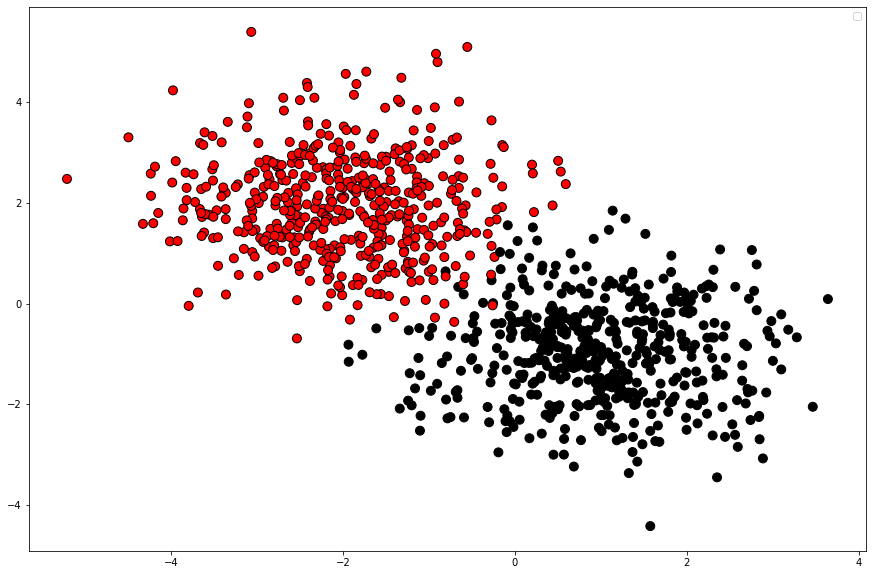

In [ ]:
from sklearn.datasets import make_blobs
blobs_X, blobs_y = make_blobs(n_samples=1000, centers=[[-2, 2],[1, -1]], cluster_std=1, random_state=13)

colors = ("red", "k")
colored_y = np.zeros(blobs_y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[blobs_y == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(blobs_X[:, 0], blobs_X[:, 1], c=colored_y, edgecolors='K', s=80)
plt.legend()
plt.show()

## Датасет [Титаник](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

In [ ]:
!wget -c https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2022-03-10 08:49:37--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
ls 

first_tree.dot  sample_data/  titanic.csv  tree_bp.dot


In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.shape

(887, 8)

In [ ]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
415,1,2,Miss. Lyyli Karoliina Silven,female,18.0,0,2,13.0000
863,0,1,Mr. Washington Augustus II Roebling,male,31.0,0,0,50.4958
481,1,1,Mr. Dickinson H Bishop,male,25.0,1,0,91.0792
871,1,3,Miss. Adele Kiamie Najib,female,15.0,0,0,7.2250
69,0,2,Mr. Stephen Curnow Jenkin,male,32.0,0,0,10.5000


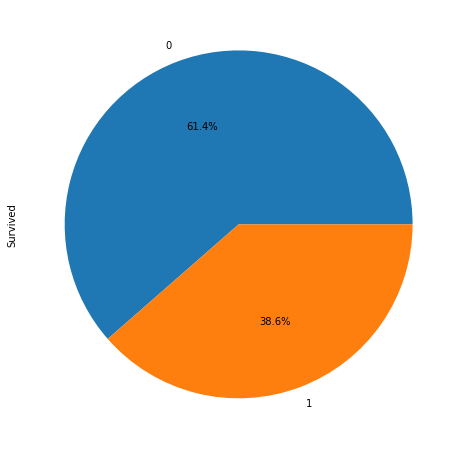

In [ ]:
plt.figure(figsize=(8, 8))
df.Survived.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
df.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [ ]:
features = ["Pclass", "Sex", "Siblings/Spouses Aboard", "Parents/Children Aboard"]

In [ ]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [ ]:
y = df.Survived.values
X = df[features]
X

,Pclass,Sex,Siblings/Spouses Aboard,Parents/Children Aboard
0,3,male,1,0
1,1,female,1,0
2,3,female,0,0
3,1,female,1,0
4,3,male,0,0
...,...,...,...,...
882,2,male,0,0
883,1,female,0,0
884,3,female,1,2
885,1,male,0,0


In [ ]:
y

array([8, 2, 7, ..., 4, 1, 8], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)


# Деревья решений

*   В каждой вершине дерева находится вопрос
*   В зависимости от ответа на вопрос, алгоритм направляется в нужную ветвь  дерева
*   Листы дерева соответствуют решению алгоритма

<img src=https://hsto.org/files/194/9b6/ae9/1949b6ae97ab4fc9b1a37fbf182eda8f.gif width=500/>

<img src=https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg width=500/>


$$
\begin{aligned}
\frac{L}{Q} H(p_{L}) + \frac{R}{Q} H(p_{R}) \rightarrow \min
\end{aligned}
$$

$ Q - $ число объектов в вершине     
$ L - $ количество объектов первого класса   
$ R - $ число объектов второго класса  
$ p_{L} - $ доля объектов 1-го класса в левой дочерней вершине  
$ p_{R} - $ доля объектов 1-го класса в правой дочерней вершине  


Энтропия:
$$
\begin{aligned}
H(q) &= -q \log q - (1-q) \log (1 - q)
\end{aligned}
$$

Индекс Джини:
$$
\begin{aligned}
H(q) &= 4q(1-q)
\end{aligned}
$$

In [ ]:
from sklearn.tree import DecisionTreeClassifier

first_tree = DecisionTreeClassifier(random_state=13, max_depth=20)
first_tree

DecisionTreeClassifier(max_depth=20, random_state=13)

## Датасет Титаник

In [ ]:
try:
  first_tree.fit(X_train, y_train)
except Exception as e:
  print(e)

could not convert string to float: 'male'


In [ ]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [ ]:
pd.get_dummies(df['Sex'], prefix="Sex")

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
882,0,1
883,1,0
884,1,0
885,0,1


In [ ]:
df[features]

,Pclass,Sex,Siblings/Spouses Aboard,Parents/Children Aboard
0,3,male,1,0
1,1,female,1,0
2,3,female,0,0
3,1,female,1,0
4,3,male,0,0
...,...,...,...,...
882,2,male,0,0
883,1,female,0,0
884,3,female,1,2
885,1,male,0,0


In [ ]:
X = pd.concat([df[features], pd.get_dummies(df['Sex'], prefix="Sex")], axis=1).drop(['Sex'], axis=1)
X

,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1
...,...,...,...,...,...
882,2,0,0,0,1
883,1,0,0,1,0
884,3,1,2,1,0
885,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [ ]:
first_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=13)

In [ ]:
y_train

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(first_tree, out_file='first_tree.dot', feature_names=X_train.columns, class_names=['Not survived', 'Survived'], filled=True)

In [ ]:
!ls

first_tree.dot	sample_data  titanic.csv  tree_bp.dot


In [ ]:
!cat first_tree.dot

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Sex_female <= 0.5\ngini = 0.47\nsamples = 665\nvalue = [414, 251]\nclass = Not survived", fillcolor="#f5cdb1"] ;
1 [label="Pclass <= 1.5\ngini = 0.296\nsamples = 426\nvalue = [349, 77]\nclass = Not survived", fillcolor="#eb9d65"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Siblings/Spouses Aboard <= 0.5\ngini = 0.456\nsamples = 94\nvalue = [61, 33]\nclass = Not survived", fillcolor="#f3c5a4"] ;
1 -> 2 ;
3 [label="Parents/Children Aboard <= 1.5\ngini = 0.438\nsamples = 68\nvalue = [46, 22]\nclass = Not survived", fillcolor="#f1bd98"] ;
2 -> 3 ;
4 [label="Parents/Children Aboard <= 0.5\ngini = 0.43\nsamples = 64\nvalue = [44, 20]\nclass = Not survived", fillcolor="#f1ba93"] ;
3 -> 4 ;
5 [label="gini = 0.432\nsamples = 57\nvalue = [39, 18]\nclass = Not survived", fillcolor="#f1bb94"] ;
4 -> 5 ;
6 [label="gini = 0.408\nsamples = 7\nval

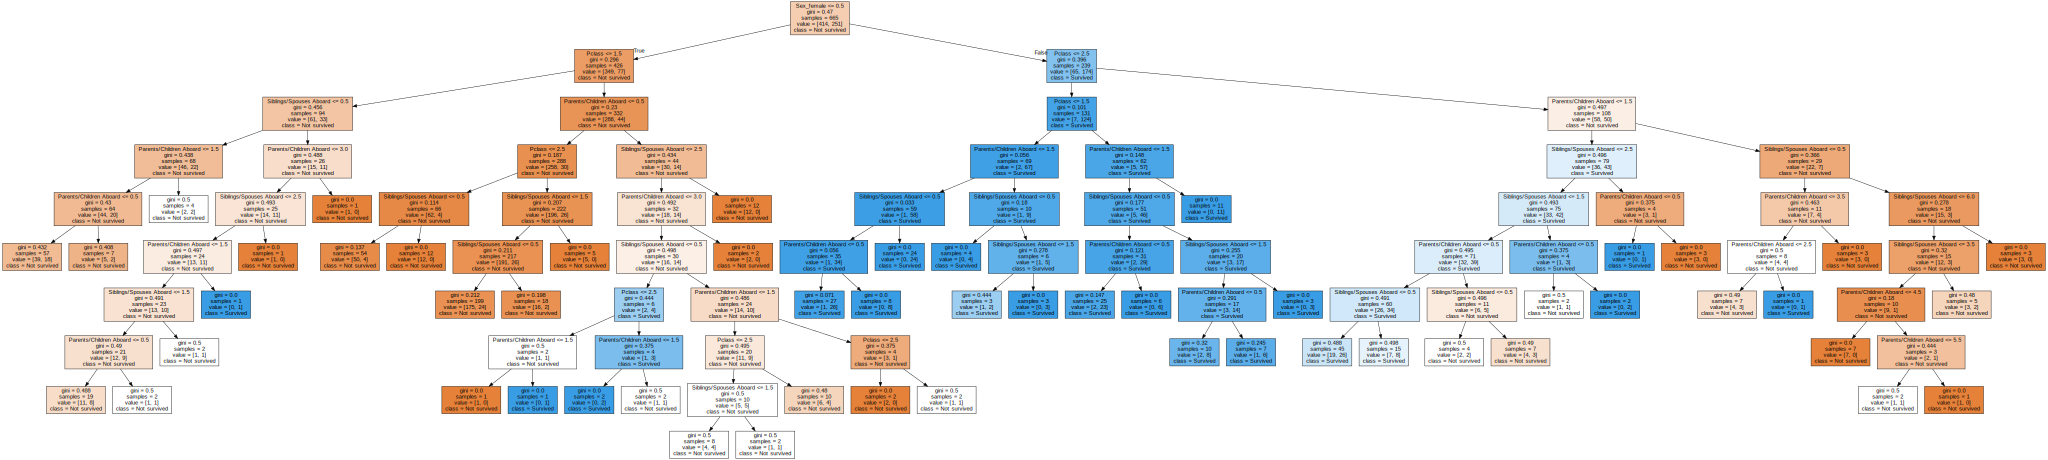

In [ ]:
import graphviz
from IPython.core.display import display

with open("first_tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

## Датасет-пример: пятна

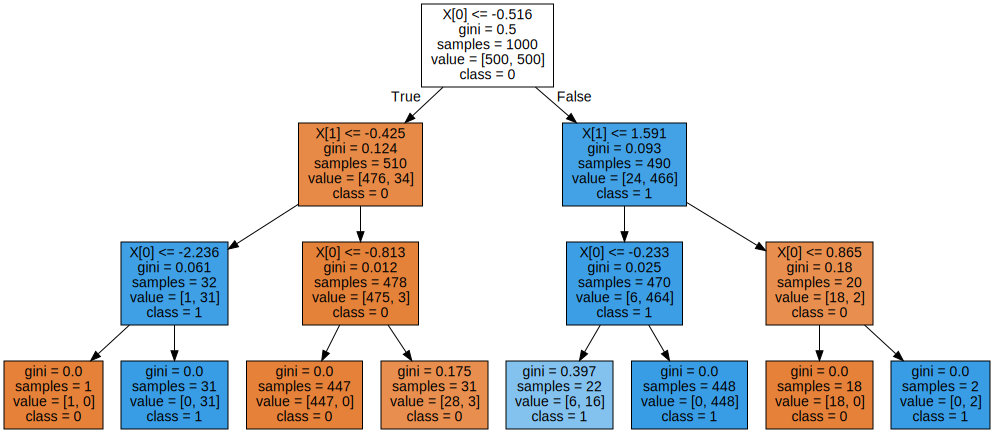

In [ ]:
from sklearn.tree import export_graphviz

blob_tree = DecisionTreeClassifier(random_state=13, max_depth=3)
blob_tree.fit(blobs_X, blobs_y)
graphviz.Source(export_graphviz(blob_tree, filled=True, class_names=['0', '1']))


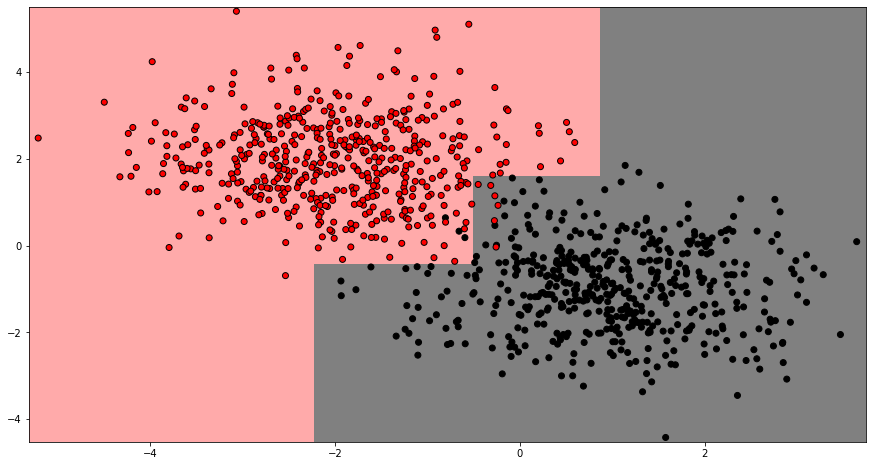

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(blobs_X[:,0]) - eps, np.max(blobs_X[:,0]) + eps, 500),
                     np.linspace(np.min(blobs_X[:,1]) - eps, np.max(blobs_X[:,1]) + eps, 500))

Z = blob_tree.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', 'grey'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(blobs_X[:, 0], blobs_X[:, 1], c=colored_y, edgecolors='K')
plt.show()

## Оценка точности классификации

In [ ]:
y_pred = first_tree.predict(X_test)

error = 0
confusion_matrix = np.zeros([2,2], int)
for i in range(X_test.shape[0]):
    confusion_matrix[y_test[i], y_pred[i]] += 1
    if y_test[i] != y_pred[i]:
        error +=1

print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/y_pred.shape[0])
print("\nAccuracy : " ,100-(error*100)/y_pred.shape[0])
print("\nValidation set Shape :",y_pred.shape[0])


Errors in validation set:  49

Error Persentage :  22.07207207207207

Accuracy :  77.92792792792793

Validation set Shape : 222


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
y = [1] * 9 + [0]
pred = [1] * 10
y, pred


([1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(y, pred), balanced_accuracy_score(y, pred)

(0.9, 0.5)

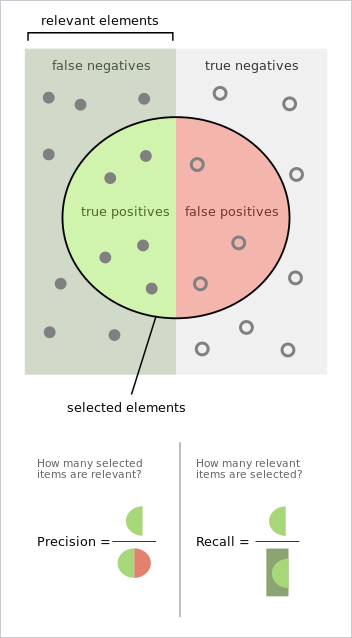

In [ ]:
recall_score([1,1,1,0,0,0], [1,1,0,1,0,0]), recall_score([1,1,1,0,0,0], [1,1,1,1,1,1]), recall_score([1,1,1,0,0,0], [1,0,0,0,0,0])

(0.6666666666666666, 1.0, 0.3333333333333333)

In [ ]:
precision_score([1,1,1,0,0,0], [1,1,0,1,0,0]), precision_score([1,1,1,0,0,0], [1,1,1,1,1,1]), precision_score([1,1,1,0,0,0], [1,0,0,0,0,0])

(0.6666666666666666, 0.5, 1.0)

In [ ]:
f1_score([1,1,1,0,0,0], [1,1,0,1,0,0]), f1_score([1,1,1,0,0,0], [1,1,1,1,1,1]), f1_score([1,1,1,0,0,0], [1,0,0,0,0,0])

(0.6666666666666666, 0.6666666666666666, 0.5)

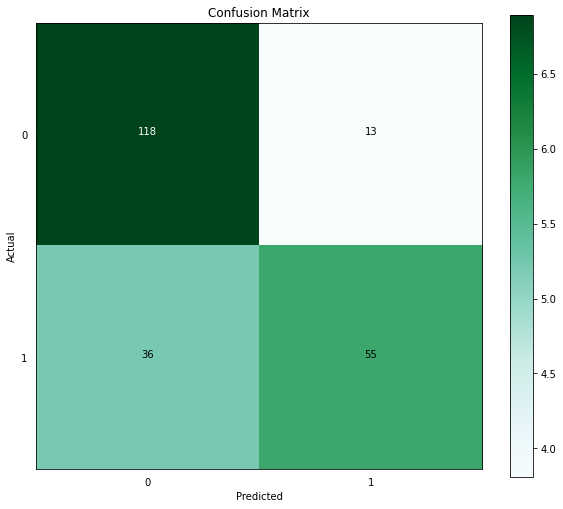

In [ ]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1), cmap="BuGn")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,2),np.arange(0,2))
plt.yticks(np.arange(0,2),np.arange(0,2))

threshold = confusion_matrix.max()/2 

for i in range(2):
    for j in range(2):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

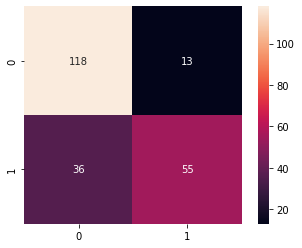

In [ ]:
sns.heatmap(confusion_matrix, annot=True, fmt="d", square=True)

## Подбор метапараметров

In [ ]:
depths = np.arange(1, 21)
features = [.25, .5, .7, 1]
tree_params = {'max_depth': depths,  'max_features': features}

In [ ]:
from sklearn.model_selection import GridSearchCV

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=10, n_jobs=-1)

In [ ]:
try:
  tree_grid.fit(X, y)
  tree_grid.best_score_, tree_grid.best_params_
except Exception as e:
  print(e)

Found input variables with inconsistent numbers of samples: [887, 10]


In [ ]:
tree_bp = DecisionTreeClassifier(max_depth=4, max_features=0.25, random_state=13)

In [ ]:
tree_bp.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.25, random_state=13)

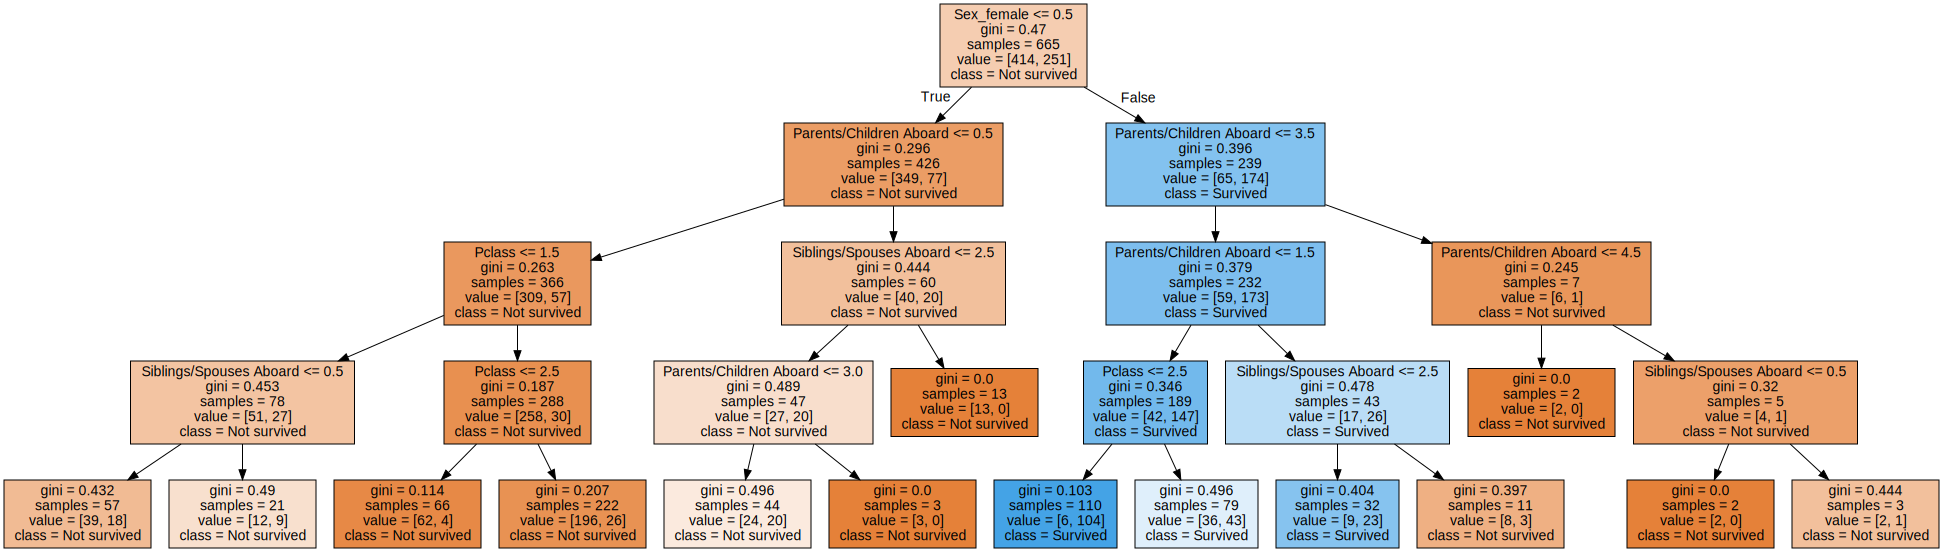

In [ ]:
export_graphviz(tree_bp, out_file='tree_bp.dot', feature_names=X_train.columns, class_names=['Not survived', 'Survived'], filled=True)

with open("tree_bp.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
y_pred = tree_bp.predict(X_test)

error = 0
confusion_matrix = np.zeros([2,2])
for i in range(X_test.shape[0]):
    confusion_matrix[y_test[i], y_pred[i]] += 1
    if y_test[i] != y_pred[i]:
        error +=1

print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/y_pred.shape[0])
print("\nAccuracy : " ,100-(error*100)/y_pred.shape[0])
print("\nValidation set Shape :",y_pred.shape[0])


Errors in validation set:  47

Error Persentage :  21.17117117117117

Accuracy :  78.82882882882883

Validation set Shape : 222


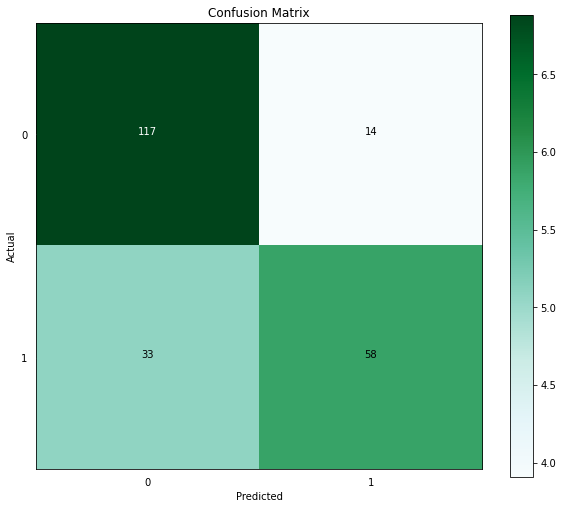

In [ ]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1), cmap="BuGn")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,2),np.arange(0,2))
plt.yticks(np.arange(0,2),np.arange(0,2))

threshold = confusion_matrix.max()/2 

for i in range(2):
    for j in range(2):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Метод k-ближайших соседей

<img src="https://www.kdnuggets.com/wp-content/uploads/popular-knn-metrics-0.png">


## Датасет-пример: пятна

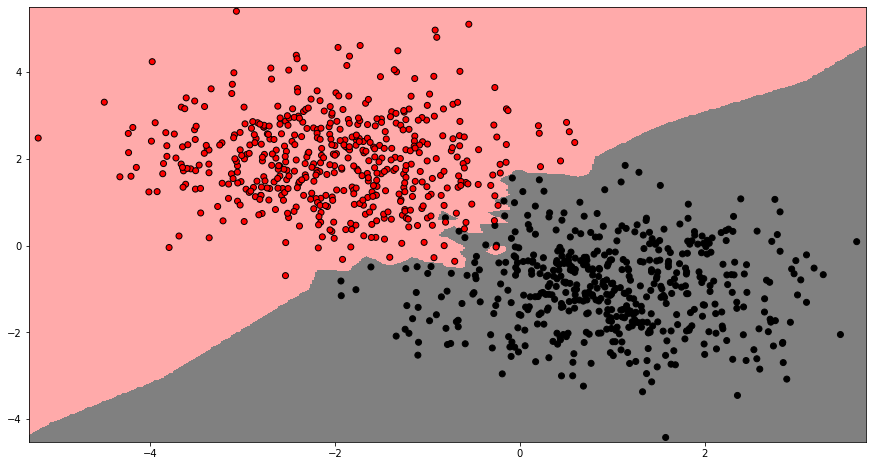

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
blob_knn = KNeighborsClassifier(n_neighbors=1)
blob_knn.fit(blobs_X, blobs_y)

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(blobs_X[:,0]) - eps, np.max(blobs_X[:,0]) + eps, 500),
                     np.linspace(np.min(blobs_X[:,1]) - eps, np.max(blobs_X[:,1]) + eps, 500))

Z = blob_knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', 'grey'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(blobs_X[:, 0], blobs_X[:, 1], c=colored_y, edgecolors='K')
plt.show()

## Датасет MNIST

In [ ]:
cat /content/sample_data/README.md

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).


In [ ]:
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)
mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv', header=None)

In [ ]:
mnist_train.sample(4)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
6612,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15263,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4920,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_train.shape

(20000, 785)

In [ ]:
from sklearn import datasets

digits = datasets.load_digits()

In [ ]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [ ]:
images = digits.images
targets = digits.target

images[0].shape

(8, 8)

In [ ]:
from tensorflow import keras

(x_train, labels_train), (x_test, labels_test) = keras.datasets.mnist.load_data()

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_test, labels_test, test_size=0.25, random_state=13)

In [ ]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (7500, 28, 28)
7500 train samples
2500 test samples


In [ ]:
labels_train[0], x_train[0]

(5, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         

8


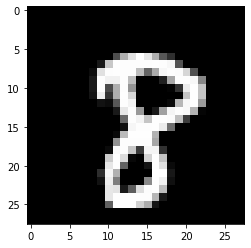

In [ ]:
print(y_train[0])
plt.imshow(X_train[0], cmap="Greys_r")
plt.show()

<img src=https://cdn.askpython.com/wp-content/uploads/2020/10/RGB-arrays-combined-to-make-image.jpg.webp width=800/>

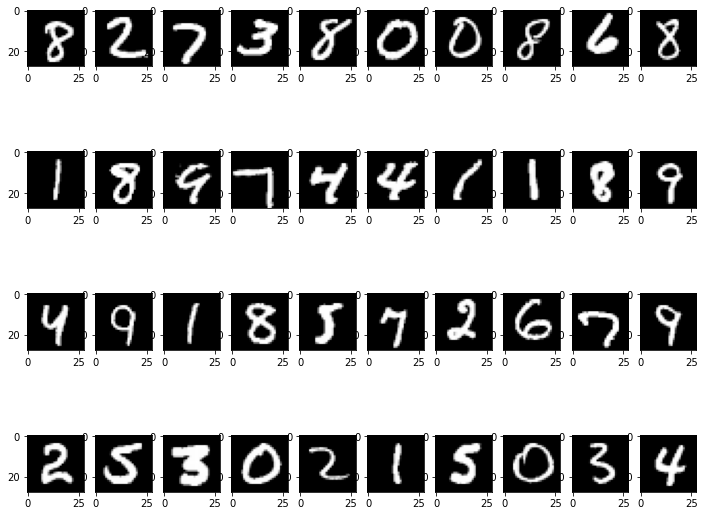

In [ ]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i], cmap="Greys_r")
plt.show()

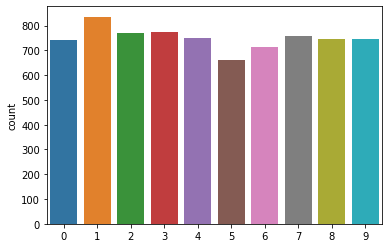

In [ ]:
sns.countplot(x=y_train)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)

In [ ]:
try:
  knn.fit(X_train, y_train)
except Exception as e:
  print(e)

Found array with dim 3. Estimator expected <= 2.


In [ ]:
X_train.shape

(7500, 28, 28)

In [ ]:
y = y_train
X = X_train.reshape(-1, 28*28)
X.shape

(7500, 784)

In [ ]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=20)

0


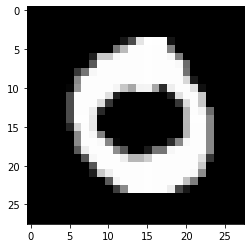

In [ ]:
print(y_test[0])
plt.imshow(X_test[0], cmap="Greys_r")
plt.show()

In [ ]:
knn.predict(np.expand_dims(X_test[0].reshape(28*28), axis=0))

array([0], dtype=uint8)

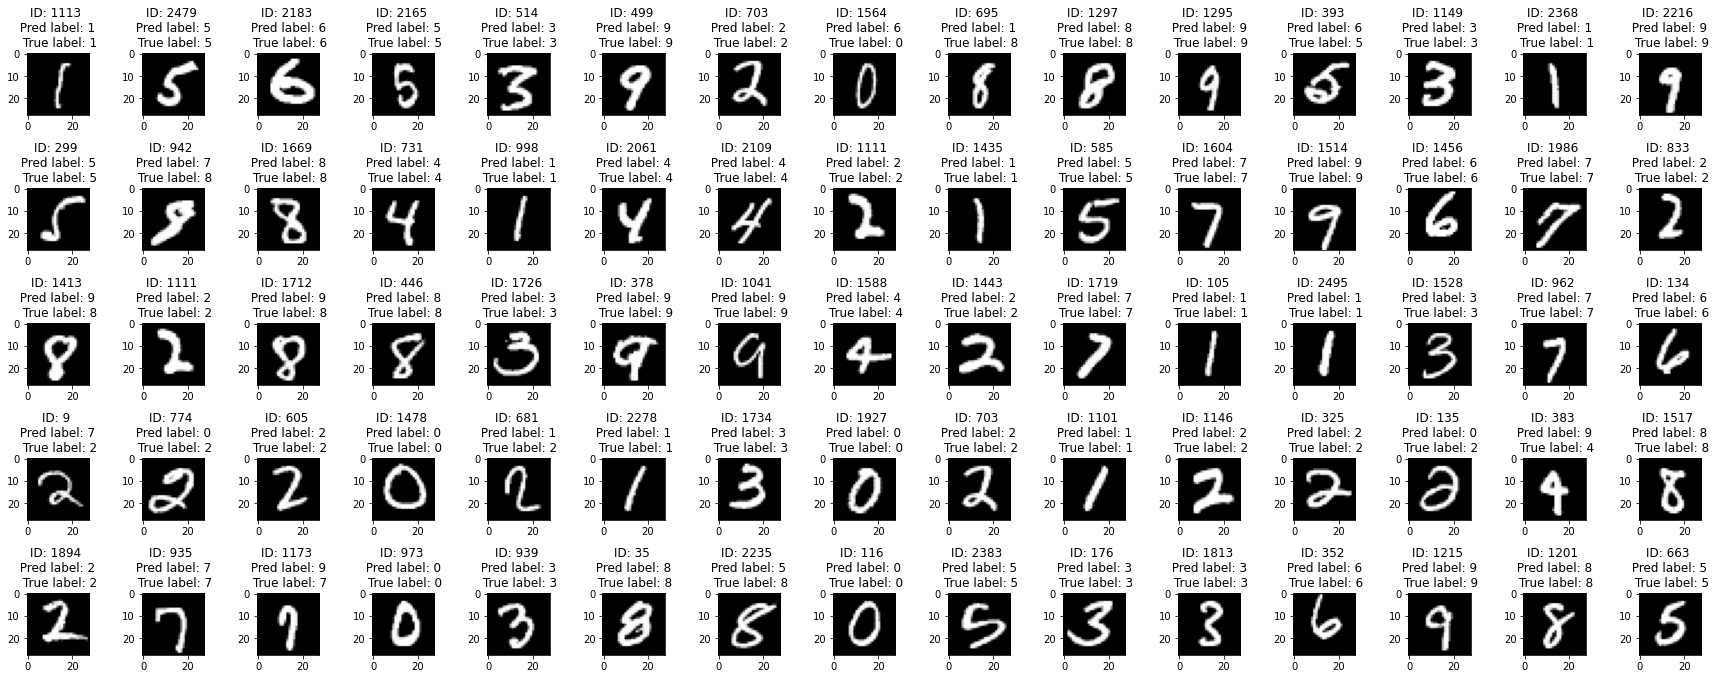

In [ ]:
n_x, n_y = 15, 5
n = n_x * n_y
plt.figure(figsize=(30,12))

img_ids = np.random.randint(X_test.shape[0], size=n)

for i, id in zip(np.arange(n), img_ids):  
    plt.subplot(n_y, n_x, i+1)
    plt.imshow(X_test[id], cmap="Greys_r")
    y_pred = knn.predict(np.expand_dims(X_test[id].reshape(28*28), axis=0))[0]
    plt.subplots_adjust(wspace=0.85)
    plt.title(f'ID: {id} \n Pred label: {y_pred} \n True label: {y_test[id]}')
plt.show()

In [ ]:
y_pred = knn.predict(X_test.reshape(-1, 28*28))

error = 0
confusion_matrix = np.zeros([10,10])
for i in range(X_test.shape[0]):
    confusion_matrix[y_test[i], y_pred[i]] += 1
    if y_test[i] != y_pred[i]:
        error +=1

print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/y_pred.shape[0])
print("\nAccuracy : " ,100-(error*100)/y_pred.shape[0])
print("\nValidation set Shape :",y_pred.shape[0])


Errors in validation set:  178

Error Persentage :  7.12

Accuracy :  92.88

Validation set Shape : 2500


In [ ]:
accuracy_score(y_test, y_pred)

0.9288

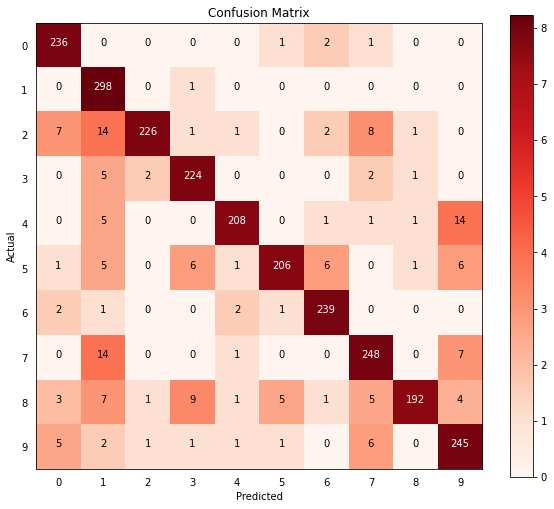

In [ ]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Reds")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Подбор числа соседей

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 4)}
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gscv.fit(X_train.reshape(-1, 28*28), y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3])})

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn2.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn2.predict(X_test.reshape(-1, 28*28))

error = 0
confusion_matrix = np.zeros([10,10])
for i in range(X_test.shape[0]):
    confusion_matrix[y_test[i], y_pred[i]] += 1
    if y_test[i] != y_pred[i]:
        error +=1

print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/y_pred.shape[0])
print("\nAccuracy : " ,100-(error*100)/y_pred.shape[0])
print("\nValidation set Shape :",y_pred.shape[0])


Errors in validation set:  109

Error Persentage :  4.36

Accuracy :  95.64

Validation set Shape : 2500


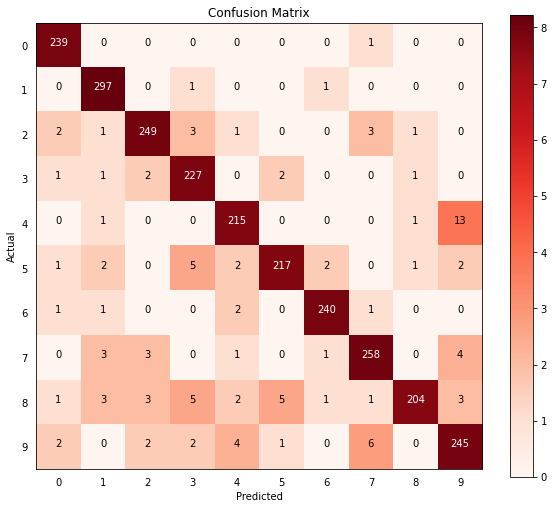

In [ ]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Reds")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Задание

1. Применить классификацию к своему датасету. Посчитать accuracy.
2. Сконструировать новый признак для своего датасета. Посчитать accuracy классификации по данным с новым признаком.